Regions: ['WT', 'TC', 'ET']
Dice: [0.8835, 0.7925, 0.7554]
Hausdorff: [4.3723, 5.6751, 4.8521]


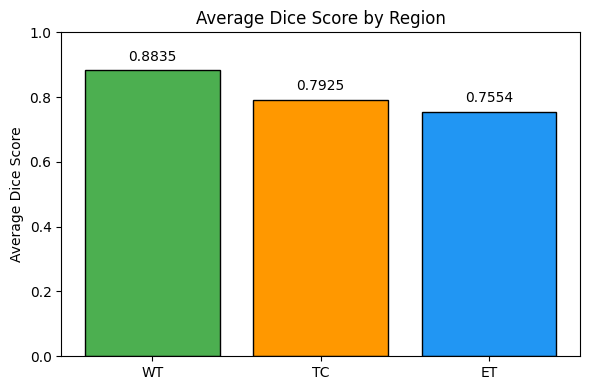

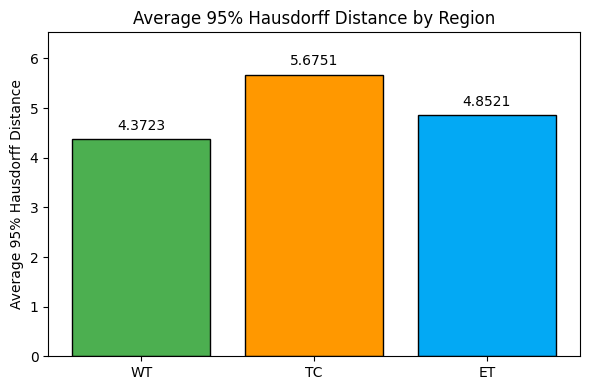

In [2]:
import re
import matplotlib.pyplot as plt

# === Đọc file txt ===
file_path = "Stage1_VAE/evaluation_results.txt"  # đổi đường dẫn nếu cần
with open(file_path, "r") as f:
    content = f.read()

# === Trích xuất dữ liệu bằng regex ===
regions = re.findall(r"Region:\s*(\w+)", content)
dice_scores = [float(x) for x in re.findall(r"Average Dice Score:\s*([\d.]+)", content)]
haus95 = [float(x) for x in re.findall(r"Average 95% Hausdorff Distance:\s*([\d.]+)", content)]

print("Regions:", regions)
print("Dice:", dice_scores)
print("Hausdorff:", haus95)

# === Màu cho từng cột ===
colors_dice = ['#4CAF50', '#FF9800', '#2196F3']
colors_haus = ['#4CAF50', '#FF9800', '#03A9F4']

# --------- Vẽ biểu đồ Dice ---------
plt.figure(figsize=(6, 4))
bars = plt.bar(regions, dice_scores, color=colors_dice, edgecolor='black')
plt.ylim(0, 1.0)
plt.title("Average Dice Score by Region")
plt.ylabel("Average Dice Score")

# Hiển thị giá trị
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, f"{height:.4f}",
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# --------- Vẽ biểu đồ Hausdorff ---------
plt.figure(figsize=(6, 4))
bars = plt.bar(regions, haus95, color=colors_haus, edgecolor='black')
plt.title("Average 95% Hausdorff Distance by Region")
plt.ylabel("Average 95% Hausdorff Distance")
ymax = max(haus95) * 1.15
plt.ylim(0, ymax)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + (ymax * 0.02), f"{height:.4f}",
             ha='center', va='bottom')

plt.tight_layout()
plt.show()
